In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/trm/MonthlyTRMM_3B43/3B43.1998_2008.nc')
 

data

<xarray.Dataset>
Dimensions:  (time: 132, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2008-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 ...
    datesec  (time) timedelta64[ns] ...
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [3]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:  (time: 95, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-02-01 1998-03-01 ... 2005-12-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980201 19980301 19980401 ... 20051101 20051201
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [4]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 400, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 -49.88 -49.62 -49.38 -49.12 ... 49.38 49.62 49.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [5]:
#for i in data.latitude.values:
 #   print(i)

In [6]:
#for i in data.longitude.values:
 #   print(i)

In [7]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
jjas_data

<xarray.Dataset>
Dimensions:  (time: 32, lat: 40, lon: 32)
Coordinates:
  * time     (time) datetime64[ns] 1998-06-01 1998-07-01 ... 2005-09-01
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
Data variables:
    date     (time) int32 19980601 19980701 19980801 ... 20050801 20050901
    datesec  (time) timedelta64[ns] 1 days 1 days 1 days ... 1 days 1 days
    precip   (time, lat, lon) float32 ...
Attributes:
    creation_date:             Thu Nov  5 16:19:03 CET 2009
    Conventions:               None
    source_html:               \nhttp://disc.sci.gsfc.nasa.gov/data/datapool/...
    title:                     TRMM: 3B43
    history:                   Thu Nov  5 16:26:10 2009: ncrcat 3B43.1998.nc ...
    nco_openmp_thread_number:  1

In [8]:
#interpolating to low resolution 
#new_lon=np.arange(86,94,0.5625)
#new_lat=np.arange(17,28,.556914)
#jjas_data = jjas_data.interp(longitude=new_lon,latitude=new_lat)
#jjas_data

In [9]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean

<xarray.DataArray 'precip' (lat: 40, lon: 32)>
array([[0.36424097, 0.37230343, 0.37556937, ..., 0.9275374 , 0.8777441 ,
        0.7401172 ],
       [0.3488904 , 0.3580809 , 0.37171277, ..., 0.8381174 , 0.8546289 ,
        0.7661515 ],
       [0.35725656, 0.38105756, 0.38026428, ..., 0.7783064 , 0.7250169 ,
        0.7301341 ],
       ...,
       [0.30676398, 0.28645703, 0.2692595 , ..., 0.3147538 , 0.3260526 ,
        0.37545067],
       [0.31019294, 0.28211737, 0.25408417, ..., 0.2937004 , 0.295968  ,
        0.31669715],
       [0.27611408, 0.25033024, 0.2144223 , ..., 0.30539277, 0.3226247 ,
        0.3085496 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
  * lon      (lon) float32 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88

In [10]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean*24
 


trmm = pr_mm

In [11]:
 #opening gcm noresm data

data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/Noresm1-M/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc')

data

<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [12]:
#changing time dim to datetime64[ns] dtype

datetimeindex = data.indexes['time'].to_datetimeindex()
data['time']=datetimeindex
data

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_27729/1463838701.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = data.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1872, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2005-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2006-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [13]:
#to select the year from 1980 to 2015
data = data.sel(time=slice('1998-01-16T12:00:00.000000000','2005-12-16T00:00:00.000000000'))
data

<xarray.Dataset>
Dimensions:    (time: 95, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-16T12:00:00 ... 2005-11-16
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-01-01 00:00:00 ... 2005-12-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [14]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.Dataset>
Dimensions:    (time: 32, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2005-09-16
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-06-01 00:00:00 ... 2005-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.05 -89.05 ... 89.05 89.05 90.0
    lon_bnds   (lon, bnds) float64 -1.25 1.25 1.25 3.75 ... 356.2 356.2 358.8
    pr         (time, lat, lon) float32 ...
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [15]:
#jjas_data.x.values
#jjas_data.y.values


In [16]:
#interpolating to low resolution 
new_lon=np.arange(86.125,94,0.25)
new_lat=np.arange(18.125,28,.25)
jjas_data = jjas_data.interp(lon=new_lon,lat=new_lat)
jjas_data

<xarray.Dataset>
Dimensions:    (time: 32, bnds: 2, lat: 40, lon: 32)
Coordinates:
  * time       (time) datetime64[ns] 1998-06-16 ... 2005-09-16
  * lon        (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat        (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1998-06-01 00:00:00 ... 2005-10-01 00:00:00
    lat_bnds   (lat, bnds) float64 17.18 19.07 17.43 19.32 ... 28.57 26.93 28.82
    lon_bnds   (lon, bnds) float64 84.88 87.38 85.12 87.62 ... 94.88 92.62 95.12
    pr         (time, lat, lon) float64 0.0001094 0.000115 ... 0.00026 0.0002537
Attributes: (12/26)
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    ...                     ...
    table_id:               Table Amon (27 April 2011) a5a1c518f52ae340313ba0...
    title:                  NorESM1-M model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.6.0

In [17]:
#to select the x and y coordinates
#jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(18,28))
#jjas_data

In [18]:
#getting the mean for JJAS data
jjas_mean = jjas_data.pr.mean('time')
 
jjas_mean

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[9.47903798e-05, 9.49619808e-05, 9.51335817e-05, ...,
        1.09061879e-04, 1.09909299e-04, 1.10756719e-04],
       [9.48772536e-05, 9.49447216e-05, 9.50121897e-05, ...,
        1.06769355e-04, 1.07641507e-04, 1.08513659e-04],
       [9.49641273e-05, 9.49274625e-05, 9.48907978e-05, ...,
        1.04476830e-04, 1.05373715e-04, 1.06270599e-04],
       ...,
       [3.00519668e-04, 3.09224401e-04, 3.17929135e-04, ...,
        2.63212944e-04, 2.57763006e-04, 2.52313067e-04],
       [2.95914358e-04, 3.04070238e-04, 3.12226119e-04, ...,
        2.62831255e-04, 2.58001002e-04, 2.53170749e-04],
       [2.68768520e-04, 2.75533534e-04, 2.82298547e-04, ...,
        2.47295736e-04, 2.43882796e-04, 2.40469857e-04]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [19]:
noresm = jjas_mean*86400
noresm

<xarray.DataArray 'pr' (lat: 40, lon: 32)>
array([[ 8.18988882,  8.20471514,  8.21954146, ...,  9.42294638,
         9.49616345,  9.56938053],
       [ 8.19739471,  8.20322395,  8.20905319, ...,  9.22487224,
         9.30022619,  9.37558015],
       [ 8.2049006 ,  8.20173276,  8.19856493, ...,  9.0267981 ,
         9.10428893,  9.18177977],
       ...,
       [25.96489929, 26.71698826, 27.46907723, ..., 22.74159837,
        22.27072368, 21.79984898],
       [25.56700052, 26.27166859, 26.97633667, ..., 22.70862047,
        22.29128657, 21.87395268],
       [23.2216001 , 23.8060973 , 24.3905945 , ..., 21.36635158,
        21.07147359, 20.77659561]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [20]:
bias = noresm - trmm
bias

<xarray.DataArray (lat: 40, lon: 32)>
array([[ -0.55189432,  -0.73056662,  -0.79412374, ..., -12.83795031,
        -11.56969348,  -8.19343304],
       [ -0.17597451,  -0.39071774,  -0.71205315, ..., -10.88994634,
        -11.21086695,  -9.01205603],
       [ -0.36925712,  -0.94364916,  -0.92777784, ...,  -9.65255562,
         -8.29611695,  -8.34144029],
       ...,
       [ 18.60256409,  19.84201973,  21.00684893, ...,  15.18750692,
         14.44546113,  12.78903241],
       [ 18.12236989,  19.50085179,  20.87831659, ...,  15.65981094,
         15.18805467,  14.27322083],
       [ 16.59486251,  17.79817131,  19.24445917, ...,  14.03692481,
         13.32848024,  13.37140514]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

In [21]:
bias_percentage = ((noresm - trmm)/trmm)*100
bias_percentage

<xarray.DataArray (lat: 40, lon: 32)>
array([[ -6.31329233,  -8.17620123,  -8.81022009, ..., -57.67040964,
        -54.92154208, -46.12688754],
       [ -2.10159739,  -4.54643227,  -7.98166862, ..., -54.13892398,
        -54.65757905, -49.01149851],
       [ -4.30662846, -10.31831334, -10.16593248, ..., -51.67499778,
        -47.67772088, -47.60221158],
       ...,
       [252.67206082, 288.61251726, 325.0712906 , ..., 201.05008008,
        184.60033824, 141.92978296],
       [243.42873156, 288.01328346, 342.37861357, ..., 222.16249254,
        213.81893293, 187.78745401],
       [250.42281019, 296.24484976, 373.95944598, ..., 191.51463353,
        172.13601544, 180.56801102]])
Coordinates:
  * lon      (lon) float64 86.12 86.38 86.62 86.88 ... 93.12 93.38 93.62 93.88
  * lat      (lat) float64 18.12 18.38 18.62 18.88 ... 27.12 27.38 27.62 27.88

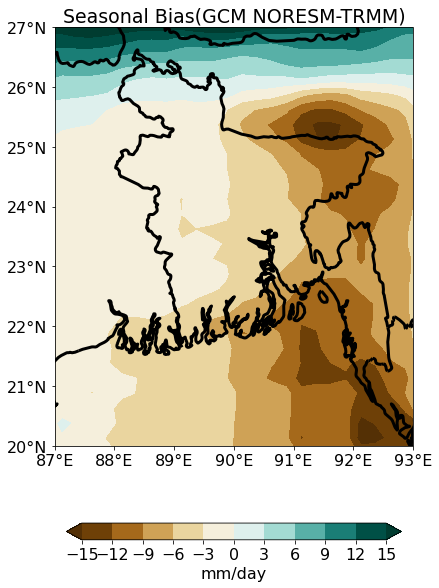

In [27]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


plt.rcParams['font.size'] = '16'


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias['lon'], bias['lat'],bias[:,:],
                levels=np.arange(-15,15+3,3),  transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, ticks=np.arange(-15,15+3,3), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)



plt.title('Seasonal Bias(GCM NORESM-TRMM)',fontsize=19)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias(gcm noresm-trmm).png")



Text(0.5, 1.0, 'Seasonal Bias-Percentage(GCM NORESM-TRMM)')

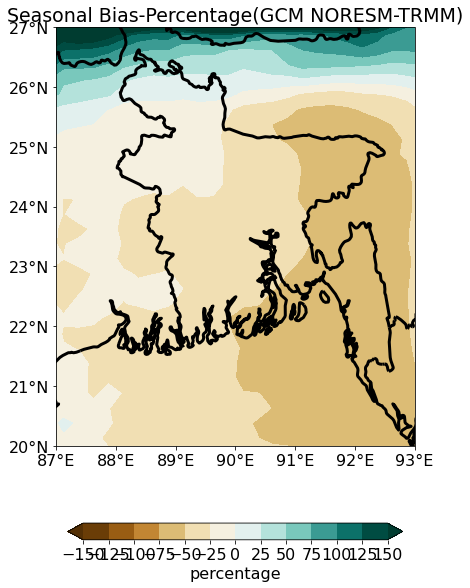

In [26]:
# Plotting bias percentage 

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(bias_percentage['lon'], bias_percentage['lat'],bias_percentage[:,:],
                 levels=np.arange(-150,150+25,25),transform = ccrs.PlateCarree(),cmap='BrBG',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1,ticks=np.arange(-150,150+25,25), orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'percentage')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


plt.title('Seasonal Bias-Percentage(GCM NORESM-TRMM)',fontsize=19)
#plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/Seasonal Bias_percentage(gcm noresm-trmm).png")







In [24]:
#cma colors
'''Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, 
BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,
Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, 
Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,
RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, 
Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,
autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, 
copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r,
gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma,
magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, 
seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
ter'''

'Colormap CET_D1A is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, \nBrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens,\nGreens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, \nPastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy,\nRdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, \nSpectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn,\nautumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, \ncopper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,\ngist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r